# Baseline model

In [ ]:
import zipfile
import os

# Paths to the uploaded zip files
train_zip_path = '/content/Aerial_Landscapes.zip'
test_zip_path = '/content/Aerial_test.zip'

# Define directories to unzip to
train_extract_dir = '/content/Aerial_Landscapes'
test_extract_dir = '/content/Aerial_test'

# Unzip the training dataset
with zipfile.ZipFile(train_zip_path, 'r') as zip_ref:
    zip_ref.extractall(train_extract_dir)

# Unzip the test dataset
with zipfile.ZipFile(test_zip_path, 'r') as zip_ref:
    zip_ref.extractall(test_extract_dir)

# Verify extraction
print("Extracted training files:", os.listdir(train_extract_dir))
print("Extracted test files:", os.listdir(test_extract_dir))


Extracted training files: ['Aerial_Landscapes']
Extracted test files: ['Aerial_test']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Corrected paths to your training and testing directories
train_data_dir = os.path.join(train_extract_dir, 'Aerial_Landscapes')
test_data_dir = os.path.join(test_extract_dir, 'Aerial_test')


# Initialize ImageDataGenerator
train_val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.25
)

# Define ImageDataGenerator for testing
test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
# Set up the training generator
train_generator = train_val_datagen.flow_from_directory(
    train_data_dir,
    target_size=(128, 128),    # Resize images to 128x128
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Set up the validation generator
validation_generator = train_val_datagen.flow_from_directory(
    train_data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Set up the test generator
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

# Display the number of images in each set
print(f"Number of training images: {train_generator.samples}")
print(f"Number of validation images: {validation_generator.samples}")
print(f"Number of testing images: {test_generator.samples}")


Found 7200 images belonging to 15 classes.
Found 2400 images belonging to 15 classes.
Found 2400 images belonging to 15 classes.
Number of training images: 7200
Number of validation images: 2400
Number of testing images: 2400


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf

# Set random seed for reproducibility
tf.random.set_seed(42)

# Define the baseline CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dense(15, activation='softmax')  # Assume 15 classes
])

# Compile the baseline model
model.compile(optimizer=Adam(learning_rate=0.001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6)

# Train the baseline model with the callbacks
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    callbacks=[early_stopping, reduce_lr]
)



Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


225/225 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - accuracy: 0.4741 - loss: 1.7944 - val_accuracy: 0.0921 - val_loss: 6.0521 - learning_rate: 0.0010
Epoch 2/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.7324 - loss: 0.8435 - val_accuracy: 0.2896 - val_loss: 2.9806 - learning_rate: 0.0010
Epoch 3/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - accuracy: 0.8521 - loss: 0.4567 - val_accuracy: 0.5554 - val_loss: 1.5537 - learning_rate: 0.0010
Epoch 4/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.9224 - loss: 0.2424 - val_accuracy: 0.5850 - val_loss: 1.6840 - learning_rate: 0.0010
Epoch 5/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 22s 54ms/step - accuracy: 0.9333 - loss: 0.2185 - val_accuracy: 0.5667 - val_loss: 1.9319 - learning_rate: 0.0010
Epoch 6/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - accuracy: 0.9622 - loss: 0.1295 - val_accuracy: 0.6033 - val_loss: 1.7860 - learning_rate: 0.0010
Epoch 7/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - accuracy: 0.9593 - loss: 0.1395

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print('Test accuracy:', test_acc)


75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.6981 - loss: 1.1680
Test accuracy: 0.6970833539962769


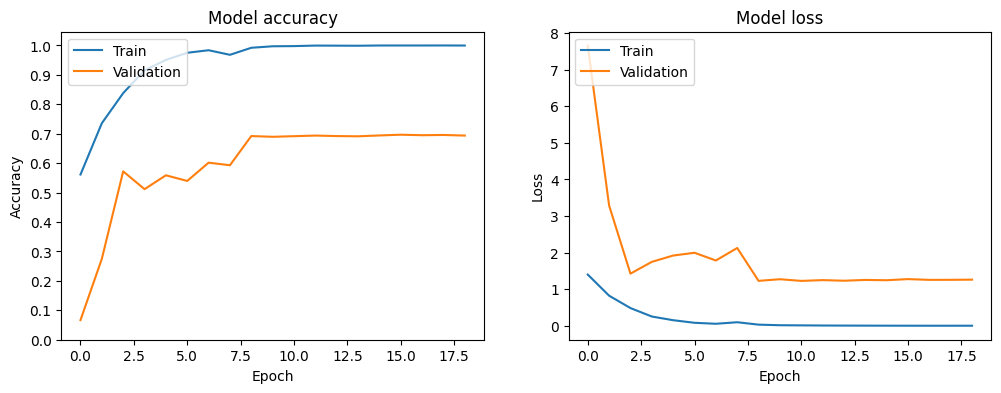

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

# Accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(history_baseline.history['accuracy'])
plt.plot(history_baseline.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.yticks(np.arange(0, 1.1, 0.1))

# Loss subplot
plt.subplot(1, 2, 2)
plt.plot(history_baseline.history['loss'])
plt.plot(history_baseline.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


# Transfer learning model

In [ ]:
import zipfile
import os

# Paths to the uploaded zip files
train_zip_path = '/content/Aerial_Landscapes.zip'
test_zip_path = '/content/Aerial_test.zip'

# Define directories to unzip to
train_extract_dir = '/content/Aerial_Landscapes'
test_extract_dir = '/content/Aerial_test'

# Unzip the training dataset
with zipfile.ZipFile(train_zip_path, 'r') as zip_ref:
    zip_ref.extractall(train_extract_dir)

# Unzip the test dataset
with zipfile.ZipFile(test_zip_path, 'r') as zip_ref:
    zip_ref.extractall(test_extract_dir)

# Verify extraction
print("Extracted training files:", os.listdir(train_extract_dir))
print("Extracted test files:", os.listdir(test_extract_dir))


Extracted training files: ['Aerial_Landscapes']
Extracted test files: ['Aerial_test']


In [ ]:
import tensorflow as tf
import os

# Set TensorFlow random seed for reproducibility
tf.random.set_seed(42)
# Paths to training and testing directories
train_data_dir = os.path.join(train_extract_dir, 'Aerial_Landscapes')
test_data_dir = os.path.join(test_extract_dir, 'Aerial_test')


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create the training data generator
train_datagen = ImageDataGenerator(
    validation_split=0.25,
)

# Create the validation data generator
val_datagen = ImageDataGenerator(
    rescale=None,
    validation_split=0.25
)

# Define ImageDataGenerator for testing
test_datagen = ImageDataGenerator(rescale=None)


# Load data from directory
train_generator = train_datagen.flow_from_directory(
    train_data_dir,              # Path to training data
    target_size=(256, 256),      # Resize images
    batch_size=32,               # Batch size
    class_mode='categorical',    # Multi-class classification
    subset='training'            # Training subset
)

validation_generator = val_datagen.flow_from_directory(
    train_data_dir,              # Path to training data
    target_size=(256, 256),      # Resize images
    batch_size=32,               # Batch size
    class_mode='categorical',    # Multi-class classification
    subset='validation'          # Validation subset
)

# Set up the test generator
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(256, 256),      # Resize images
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Display the number of images in each set
print(f"Number of training images: {train_generator.samples}")
print(f"Number of validation images: {validation_generator.samples}")
print(f"Number of testing images: {test_generator.samples}")


Found 7200 images belonging to 15 classes.
Found 2400 images belonging to 15 classes.
Found 2400 images belonging to 15 classes.
Number of training images: 7200
Number of validation images: 2400
Number of testing images: 2400


In [ ]:
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf

# Load MobileNetV3Large pre-trained model
base_model = MobileNetV3Large(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the base model layers to retain learned features initially, then unfreeze half the layers(14)
for layer in base_model.layers:
    layer.trainable = False

for layer in base_model.layers[-14:]:
    layer.trainable = True

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dense(15, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',#
              metrics=['accuracy'])


# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-5)

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


225/225 ━━━━━━━━━━━━━━━━━━━━ 45s 115ms/step - accuracy: 0.8271 - loss: 0.5880 - val_accuracy: 0.8687 - val_loss: 0.5840 - learning_rate: 0.0010
Epoch 2/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 24s 84ms/step - accuracy: 0.9715 - loss: 0.0810 - val_accuracy: 0.8942 - val_loss: 0.5188 - learning_rate: 0.0010
Epoch 3/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 19s 78ms/step - accuracy: 0.9833 - loss: 0.0550 - val_accuracy: 0.9042 - val_loss: 0.5691 - learning_rate: 0.0010
Epoch 4/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - accuracy: 0.9873 - loss: 0.0406 - val_accuracy: 0.9133 - val_loss: 0.5714 - learning_rate: 0.0010
Epoch 5/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 18s 79ms/step - accuracy: 0.9896 - loss: 0.0364 - val_accuracy: 0.9254 - val_loss: 0.4763 - learning_rate: 0.0010
Epoch 6/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - accuracy: 0.9870 - loss: 0.0341 - val_accuracy: 0.9162 - val_loss: 0.5293 - learning_rate: 0.0010
Epoch 7/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 19s 84ms/step - accuracy: 0.9947 - loss: 0.015

In [ ]:
#Save weights from best epoch
from tensorflow.keras.models import load_model
model.save('transfer_model.keras')
transfer_model = load_model('transfer_model.keras')
# Evaluate the model on the test set with best weights
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.9525 - loss: 0.2488
Test accuracy: 0.9520833492279053


In [ ]:
print(test_generator.class_indices)


{'Agriculture': 0, 'Airport': 1, 'Beach': 2, 'City': 3, 'Desert': 4, 'Forest': 5, 'Grassland': 6, 'Highway': 7, 'Lake': 8, 'Mountain': 9, 'Parking': 10, 'Port': 11, 'Railway': 12, 'Residential': 13, 'River': 14}


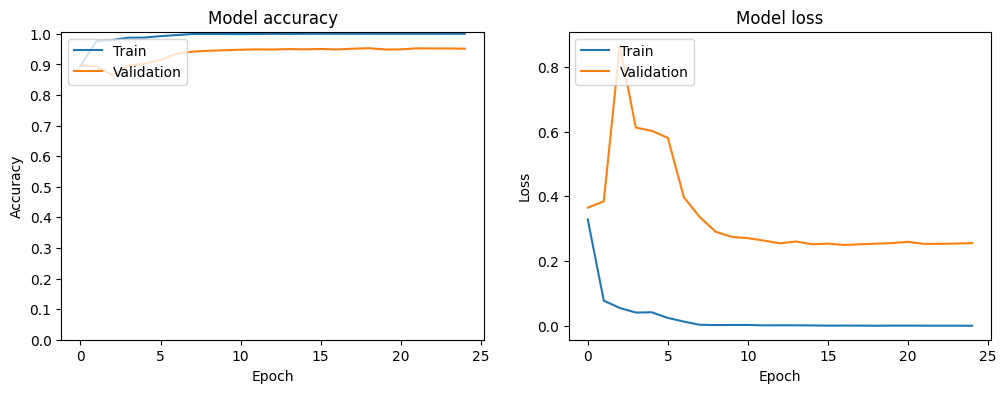

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

# Accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.yticks(np.arange(0, 1.1, 0.1))  # Set y-ticks from 0 to 1.0 with increments of 0.1

# Loss subplot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step


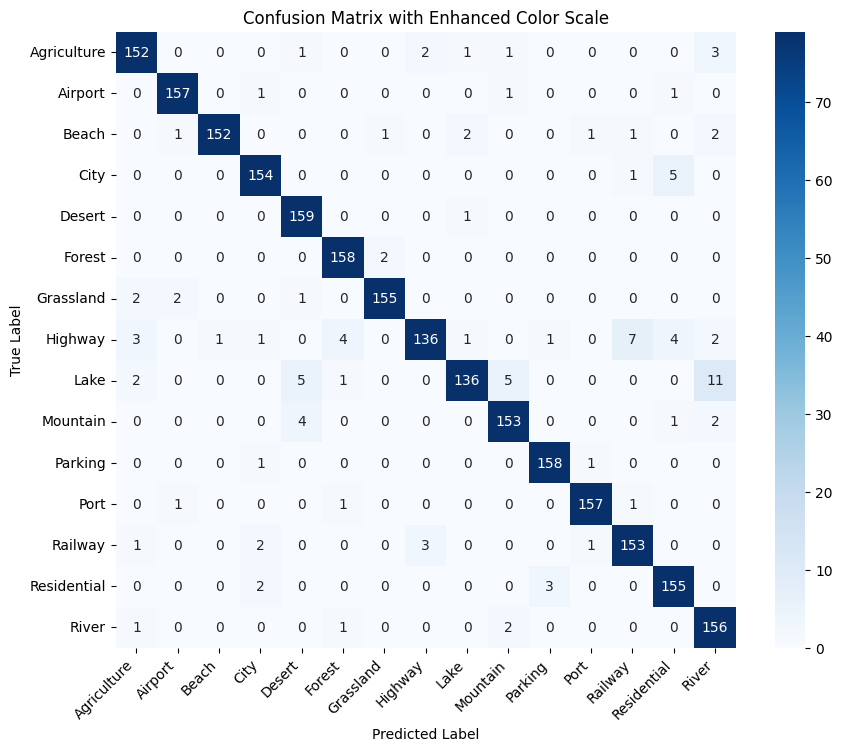

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Get the true labels from the generator
true_labels = test_generator.classes

#Predict class probabilities on the test set
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

#Create the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

#Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys(), vmin=0, vmax=np.max(cm)//2)

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.xticks(rotation=45, ha='right')  #
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Generated heatmap with shape: (8, 8)


<ipython-input-114-be1cf83b342a>:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet')


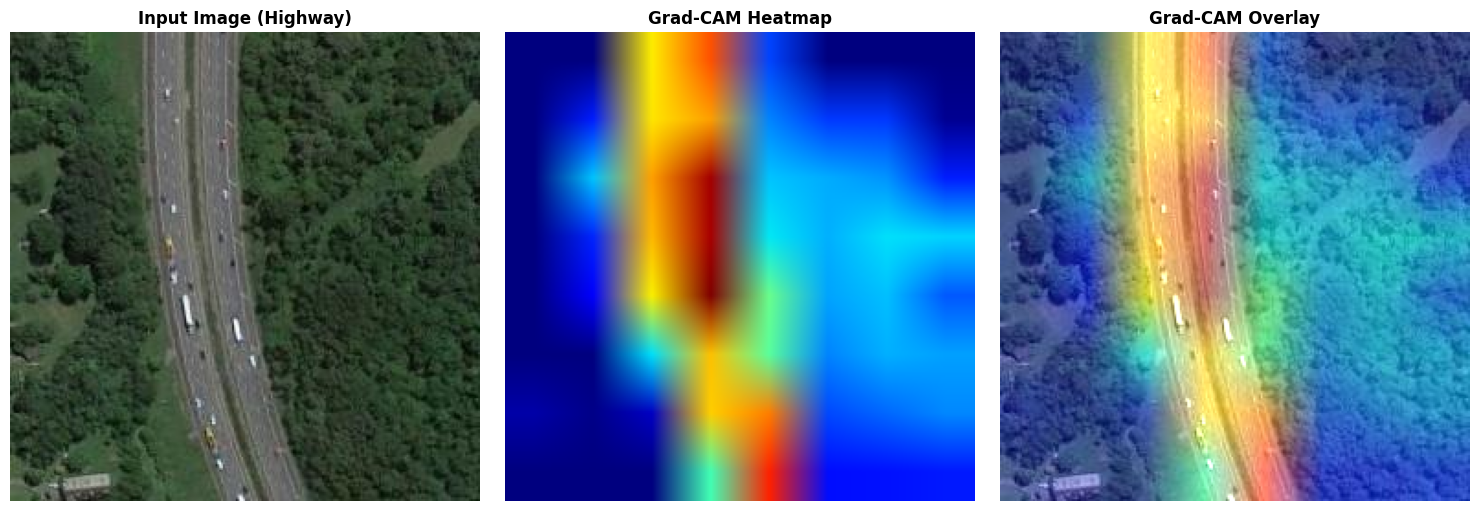

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

# Function to generate and display Grad-CAM
def generate_gradcam(model, img_array, class_idx, last_conv_layer_name):
    # Create a model that maps the input to the last convolutional layer and the output
    grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.output])

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, class_idx]

    # Compute the gradient of the predicted class with respect to the last conv layer
    grads = tape.gradient(loss, conv_outputs)

    # Pool the gradients over all axes except the channel dimension
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Get the outputs of the last conv layer
    conv_outputs = conv_outputs[0].numpy()  # Convert to numpy array

    # Multiply each channel by the pooled gradients
    for i in range(conv_outputs.shape[-1]):
        conv_outputs[:, :, i] *= pooled_grads[i].numpy()

    # Create a heatmap by averaging all the channels
    heatmap = np.mean(conv_outputs, axis=-1)

    # Normalize the heatmap between 0 and 1 for display
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)


    return heatmap

# Function to display
def display_gradcam(img_path, heatmap, alpha=0.6):
    img = image.load_img(img_path)
    img = image.img_to_array(img)

    # Rescale heatmap to range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize the heatmap
    jet = plt.cm.get_cmap('jet')

    # Create an RGB image with the heatmap
    jet_heatmap = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_heatmap[heatmap]


    # Convert the heatmap back to a NumPy array
    jet_heatmap = np.array(jet_heatmap)

    # Resize heatmap to the same size as the original image
    jet_heatmap = tf.image.resize(jet_heatmap, (img.shape[0], img.shape[1])).numpy()

    # Normalize the jet_heatmap to increase its visibility
    jet_heatmap = (jet_heatmap - jet_heatmap.min()) / (jet_heatmap.max() - jet_heatmap.min())

    # Scale the heatmap intensity to make it more visible
    jet_heatmap = np.uint8(255 * jet_heatmap)

    # Superimpose the heatmap on the original image
    superimposed_img = jet_heatmap * alpha + img

    # Clip values to be within valid RGB range
    superimposed_img = np.clip(superimposed_img, 0, 255)

    # Plot
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    # Original image
    ax[0].imshow(img.astype('uint8'))
    ax[0].set_title("Input Image (Highway)", fontweight='bold')
    ax[0].axis('off')

# Grad-CAM heatmap alone
    ax[1].imshow(jet_heatmap.astype('uint8'))
    ax[1].set_title("Grad-CAM Heatmap", fontweight='bold')
    ax[1].axis('off')

    # Image with Grad-CAM
    ax[2].imshow(superimposed_img.astype('uint8'))
    ax[2].set_title("Grad-CAM Overlay", fontweight='bold' )
    ax[2].axis('off')

    plt.tight_layout()
    plt.show()

# Specify the path to image
img_path = '/content/Aerial_Landscapes/Aerial_Landscapes/Highway/001.jpg'

# Load and preprocess the image
img = image.load_img(img_path, target_size=(256, 256))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Get the model's predictions
predictions = model.predict(img_array)
class_idx = np.argmax(predictions[0])

# Generate Grad-CAM
last_conv_layer_name = 'conv_1'  # Change this to the correct last convolutional layer of your model
heatmap = generate_gradcam(model, img_array, class_idx, last_conv_layer_name)

# Display the Grad-CAM
display_gradcam(img_path, heatmap)
